In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,0.0
2,86.0,NaN,33.0,16.0,NaN,0.0
3,91.0,NaN,34.0,24.0,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,NaN,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
float64		column 2	44
float64		column 3	33
float64		column 4	22
float64		column 5	34
float64		column 6	56


In [4]:

df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,333.000000,301.000000,312.000000,323.00000,311.000000,289.000000
mean,90.234234,69.637874,30.660256,24.53870,37.887460,3.519031
std,4.376047,17.968076,19.970073,9.99476,39.160425,3.275353
min,65.000000,23.000000,4.000000,5.00000,5.000000,0.000000
25%,88.000000,58.000000,20.000000,19.00000,16.000000,0.500000
50%,90.000000,67.000000,26.000000,23.00000,25.000000,3.000000
75%,93.000000,79.000000,33.250000,27.00000,44.000000,5.000000
max,103.000000,138.000000,155.000000,82.00000,297.000000,20.000000


<AxesSubplot:>

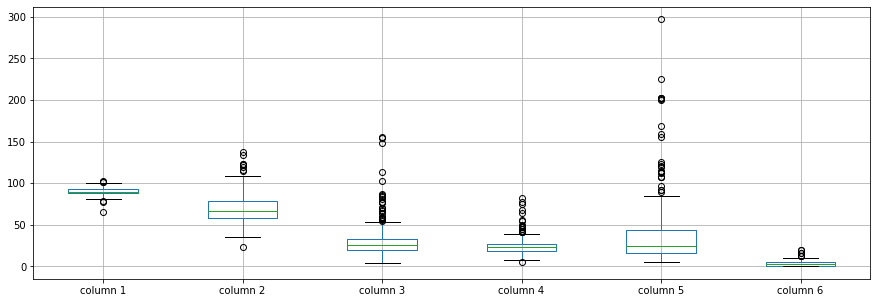

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.234234
column 2    69.637874
column 3    30.660256
column 4    24.538700
column 5    37.887460
column 6     3.519031
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.039745,0.155504,0.177654,0.233076,0.249859
column 2,0.039745,1.000000,0.018296,0.106526,0.127132,0.094743
column 3,0.155504,0.018296,1.000000,0.737516,0.498994,0.214429
column 4,0.177654,0.106526,0.737516,1.000000,0.510769,0.266567
column 5,0.233076,0.127132,0.498994,0.510769,1.000000,0.342063
column 6,0.249859,0.094743,0.214429,0.266567,0.342063,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+34,6+34+34,6+34+34+34,6+34+34+34+34,6+34+34+34,6+34+34,6+34,6], vae_layer = False, seed = 340)
imputer.build_model(df)
imputer.train_model(training_epochs=34)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 255.7502935500372
Epoch: 1 , loss: 257.0999545142764
Epoch: 2 , loss: 256.5484786260696
Epoch: 3 , loss: 255.760502406529
Epoch: 4 , loss: 255.0952446347191
Epoch: 5 , loss: 257.82413373674666
Epoch: 6 , loss: 256.47016470772877
Epoch: 7 , loss: 258.61532810756137
Epoch: 8 , loss: 256.616446358817
Epoch: 9 , loss: 257.6215987432571
Epoch: 10 , loss: 256.6447485060919
Epoch: 11 , loss: 255.78027852376303
Epoch: 12 , loss: 255.88094438825334
Epoch: 13 , loss: 257.6576915922619
Epoch: 14 , loss: 257.4699539911179
Epoch: 15 , loss: 254.54541742234002
Epoch: 16 , loss: 255.9311726888021
Epoch: 17 , loss: 254.75685846237909
Epoch: 18 , loss: 257.0446348644438
Epoch: 19 , loss: 257.195557367234
Epoch: 20 , loss: 255.5584920247396
Epoch: 21 , loss: 254.2461191813151
Epoch: 22 , loss: 257.39690362839474
Epoch: 23 , loss: 256.96880304245724
Epoch: 24 , loss: 257.9156755719866
Epoch: 25 , loss: 256.2725081670852
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
1,0.0,0.000000,0.0,0.000000,0.00000,0.000000
2,0.0,-53.620811,0.0,0.000000,-53.65905,0.000000
3,0.0,-76.645766,0.0,0.000000,0.00000,0.000000
4,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...
340,0.0,0.000000,0.0,0.000000,0.00000,0.000000
341,0.0,0.000000,0.0,0.000000,0.00000,0.000000
342,0.0,-50.811692,0.0,0.000000,0.00000,0.000000
343,0.0,0.000000,0.0,0.000000,0.00000,-4.961641


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

698.5441305739836

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.2772262241769603

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3    20.000000
column 4     0.226898
column 5    16.000000
column 6     2.000000
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.000000,45.0,27.000000,31.00000,0.000000
1,85.0,64.000000,59.0,32.000000,23.00000,0.000000
2,86.0,0.379189,33.0,16.000000,0.34095,0.000000
3,91.0,1.354234,34.0,24.000000,36.00000,0.000000
4,98.0,55.000000,13.0,17.000000,17.00000,0.000000
...,...,...,...,...,...,...
340,91.0,54.000000,25.0,22.000000,35.00000,4.000000
341,89.0,48.000000,32.0,22.000000,14.00000,4.000000
342,85.0,1.188308,22.0,23.000000,34.00000,4.000000
343,95.0,93.000000,21.0,27.000000,47.00000,1.038359


In [21]:
imputations[-1].to_excel("Bupa_NL_10(imp).xlsx", index=False, header=False)